<a href="https://colab.research.google.com/github/atharva2031/Cancer-Detection-/blob/main/Cancer_Classification_Model_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive to the colab file (drive account should be same as colab account in use)**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**We have uploaded our dataset as a zip file on drive to save space and time so we need to unzip it using the code below**

In [2]:
from zipfile import ZipFile
file_name = "/content/gdrive/MyDrive/Cervical Cancer.zip"
with ZipFile(file_name,'r') as z:
  z.extractall()
  print('Done Unzipping')

Done Unzipping




*   **Importing os module to access directories**
*   **Importing warnings module using which we will ignore any unnecessary warnings that will pop up**






In [3]:
import os
import warnings

**Creating a variable named MAIN_DIR as we will need to pass the path of the directory many times**

In [4]:
MAIN_DIR = "/content/Cervical Cancer"

**The os module is used to access the directories and so we are listing about the folder names in the main directory**

In [5]:
warnings.filterwarnings('ignore')
data_dir_list=os.listdir(MAIN_DIR)
print(data_dir_list)
path,dirs,files=next(os.walk(MAIN_DIR))
file_count=len(files)

['cervix_superficial_intermediat', 'cervix_koilocytotic', 'cervix_dyskeratotic', 'cervix_metaplastic', 'cervix_parabasal']


**Counting and printing number of images in each sub file of the directory**

In [6]:
list_count = []
for name in data_dir_list:
  list_count.append(len(os.listdir(os.path.join(MAIN_DIR,name))))
list_count

[5000, 5000, 5000, 5000, 5000]

In [7]:
for i in data_dir_list:
  print("Total images of {} are: ".format(i)+ str(len(os.listdir(MAIN_DIR+'/'+i+"/"))))

Total images of cervix_superficial_intermediat are: 5000
Total images of cervix_koilocytotic are: 5000
Total images of cervix_dyskeratotic are: 5000
Total images of cervix_metaplastic are: 5000
Total images of cervix_parabasal are: 5000


**Creating a dictionary containing the sub type of cancer and its corresponding image count**

In [8]:
dictionary = dict(map(lambda i,j : (i,j) , data_dir_list,list_count))
dictionary

{'cervix_superficial_intermediat': 5000,
 'cervix_koilocytotic': 5000,
 'cervix_dyskeratotic': 5000,
 'cervix_metaplastic': 5000,
 'cervix_parabasal': 5000}

**Plotting a bar graph showing image distribution in each class**

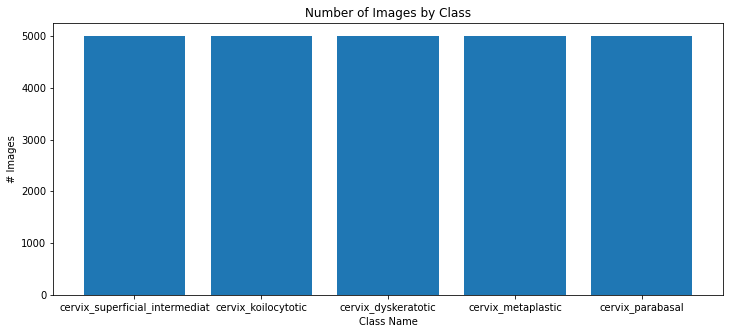

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5));
plt.bar(dictionary.keys(), dictionary.values());
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');


**Creating a list containing the path to each class which is then combined with the list of class names to create a dictionary for further use**

In [10]:
import numpy as np
from PIL import Image
List_Dir = []
for i in data_dir_list:
  List_Dir.append(MAIN_DIR+'/'+i+'/')
directories = dict(map(lambda i,j : (i,j) , data_dir_list,List_Dir))

In [11]:
List_Dir

['/content/Cervical Cancer/cervix_superficial_intermediat/',
 '/content/Cervical Cancer/cervix_koilocytotic/',
 '/content/Cervical Cancer/cervix_dyskeratotic/',
 '/content/Cervical Cancer/cervix_metaplastic/',
 '/content/Cervical Cancer/cervix_parabasal/']

In [12]:
directories

{'cervix_superficial_intermediat': '/content/Cervical Cancer/cervix_superficial_intermediat/',
 'cervix_koilocytotic': '/content/Cervical Cancer/cervix_koilocytotic/',
 'cervix_dyskeratotic': '/content/Cervical Cancer/cervix_dyskeratotic/',
 'cervix_metaplastic': '/content/Cervical Cancer/cervix_metaplastic/',
 'cervix_parabasal': '/content/Cervical Cancer/cervix_parabasal/'}

**A function which returns the dimensions of the image**

In [13]:
def get_dims(file):
#'''Returns dimenstions for an RBG image'''
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

**Using Dask (Parallel Computing tool in python) to get the dimensions of all the images and plotting them to check the variations in image size (if any)**

[########################################] | 100% Completed | 24.4s
[########################################] | 100% Completed | 20.2s
[########################################] | 100% Completed | 21.8s
[########################################] | 100% Completed | 20.2s
[########################################] | 100% Completed | 20.7s


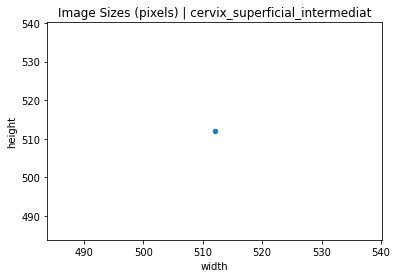

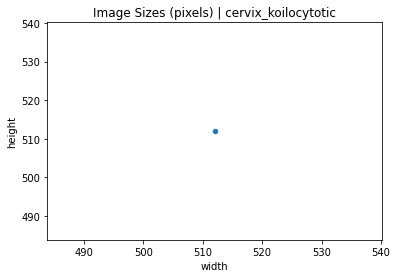

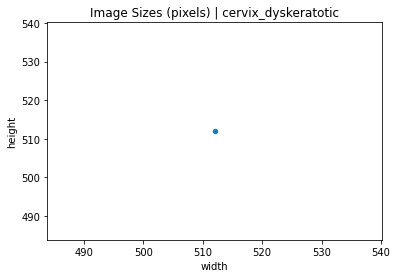

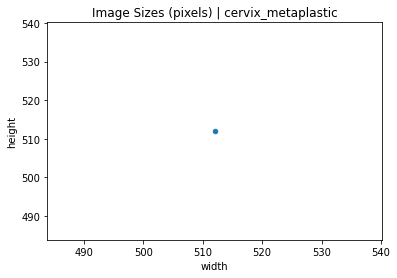

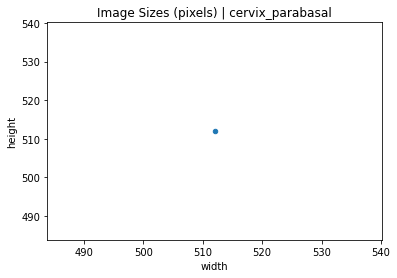

In [14]:
from dask import bag,diagnostics
import pandas as pd
for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = bag.from_sequence(filelist).map(get_dims)
  with diagnostics.ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
  plt.title('Image Sizes (pixels) | {}'.format(n))


*   **Installing Split folders module to split the dataset into training,validation and testing sets**
*   **Checking the split by printing the numbers in each set**

In [15]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Split ratio is set to standard i.e. 80% for Training, 10% for Validation and 10% for Testing since we have dataset more than the threshold required**

In [16]:
import splitfolders
splitfolders.ratio(MAIN_DIR+'/', output = "./data-splitted", ratio = (.8, .1, .1), group_prefix=None)

Copying files: 25000 files [00:05, 4844.34 files/s]


In [17]:
for i in data_dir_list:
  print("Total Training images of {} are: ".format(i)+ str(len(os.listdir("/content/data-splitted/train/"+i+"/"))))

Total Training images of cervix_superficial_intermediat are: 4000
Total Training images of cervix_koilocytotic are: 4000
Total Training images of cervix_dyskeratotic are: 4000
Total Training images of cervix_metaplastic are: 4000
Total Training images of cervix_parabasal are: 4000


In [18]:
for i in data_dir_list:
  print("Total Validation images of {} are: ".format(i)+ str(len(os.listdir("/content/data-splitted/val/"+i+"/"))))

Total Validation images of cervix_superficial_intermediat are: 500
Total Validation images of cervix_koilocytotic are: 500
Total Validation images of cervix_dyskeratotic are: 500
Total Validation images of cervix_metaplastic are: 500
Total Validation images of cervix_parabasal are: 500


In [19]:
for i in data_dir_list:
  print("Total Testing images of {} are: ".format(i)+ str(len(os.listdir("/content/data-splitted/test/"+i+"/"))))

Total Testing images of cervix_superficial_intermediat are: 500
Total Testing images of cervix_koilocytotic are: 500
Total Testing images of cervix_dyskeratotic are: 500
Total Testing images of cervix_metaplastic are: 500
Total Testing images of cervix_parabasal are: 500


**Importing all the necessary packages for model building**

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

**Preprocessing the data so as to make the model efficient and augmenting (if necessary)**

**PLEASE NOTE WHILE PREPROCESSING THE IMAGE GIVEN BY USER BEFORE SENDING IT FOR PREDICTION -** 


*   **Image Size is (200,200) for Breast Cancer Histopathology, Colon Cancer, Kidney Cancer and Lung Cancer Histopathology**
*   **Image Size is (224,224) for Breast Cancer Ultrasound**

*   **Rest all have Image Size of (256,256)**






In [21]:
train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=10, # rotation
       width_shift_range=0.2, # horizontal shift
       height_shift_range=0.2, # vertical shift
       zoom_range=0.2, # zoom
       horizontal_flip=True, 
       vertical_flip=True)# horizontal flip
        
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory('./data-splitted/train',
                                                  target_size=(256, 256),
                                                  color_mode='grayscale',
                                                  class_mode='categorical', 
                                                  batch_size=128,
                                                  )

test_dataset = test_datagen.flow_from_directory('./data-splitted/test',
                                                target_size=(256, 256),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=128,
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory('./data-splitted/val',
                                                  target_size=(256, 256),
                                                  class_mode='categorical',
                                                  batch_size=128,
                                                  color_mode='grayscale',
                                                  )

Found 20000 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


In [22]:
train_dataset.class_indices

{'cervix_dyskeratotic': 0,
 'cervix_koilocytotic': 1,
 'cervix_metaplastic': 2,
 'cervix_parabasal': 3,
 'cervix_superficial_intermediat': 4}

In [23]:
test_dataset.class_indices

{'cervix_dyskeratotic': 0,
 'cervix_koilocytotic': 1,
 'cervix_metaplastic': 2,
 'cervix_parabasal': 3,
 'cervix_superficial_intermediat': 4}

In [24]:
train_dataset.image_shape

(256, 256, 1)

**Model Building**

In [25]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(512, activation='relu'))# When you increase the number of units in dense layer the learning gets faster but it has its own disadvantages


model.add(Dense(len(data_dir_list), activation='softmax'))

**Model Plotting (2 ways)**

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

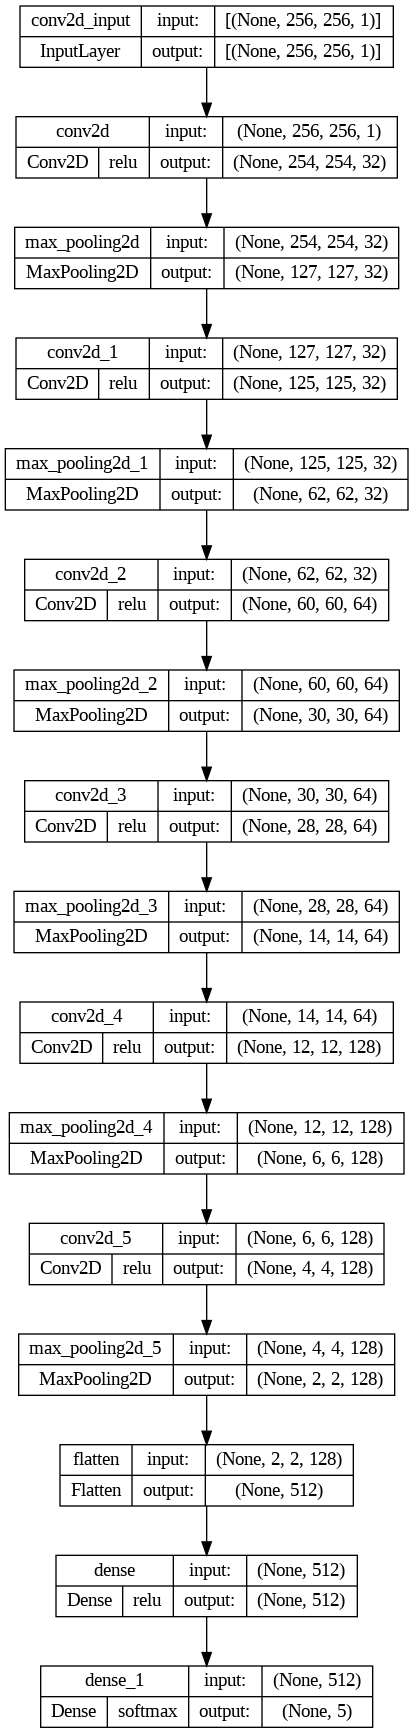

In [27]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

**Since we don't want our model to run when a saturation is reached or the model is overfitting, we make use of checkpoints and callbacks to stop training early if the conditions are meet**

In [28]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=10,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor='val_accuracy',filepath='./bestmodel.h5',verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

*   **The default optimizer is Adam but we are using RMSProp due to time constraint which better optimizes in fewer iterations**
*   **Since our data has multiple classes or categories so we use Categorical Crossentropy as our loss function**



In [30]:
import tensorflow.keras
METRICS = [
        'accuracy',
        tensorflow.keras.metrics.Precision(name='precision'),
        tensorflow.keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

**Training the model**

In [31]:
Info = model.fit_generator(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=75,verbose=1,
                 callbacks=cd
                 )

Epoch 1/75
157/157 [==============================] - ETA: 0s - loss: 1.5428 - accuracy: 0.3005 - precision: 0.4969 - recall: 0.0280
Epoch 1: val_accuracy improved from -inf to 0.45680, saving model to ./bestmodel.h5
157/157 [==============================] - 224s 1s/step - loss: 1.5428 - accuracy: 0.3005 - precision: 0.4969 - recall: 0.0280 - val_loss: 1.3537 - val_accuracy: 0.4568 - val_precision: 0.8645 - val_recall: 0.1072
Epoch 2/75
157/157 [==============================] - ETA: 0s - loss: 1.2969 - accuracy: 0.4566 - precision: 0.6736 - recall: 0.2063
Epoch 2: val_accuracy improved from 0.45680 to 0.47720, saving model to ./bestmodel.h5
157/157 [==============================] - 207s 1s/step - loss: 1.2969 - accuracy: 0.4566 - precision: 0.6736 - recall: 0.2063 - val_loss: 1.2457 - val_accuracy: 0.4772 - val_precision: 0.6618 - val_recall: 0.2748
Epoch 3/75
157/157 [==============================] - ETA: 0s - loss: 1.1341 - accuracy: 0.5328 - precision: 0.7227 - recall: 0.3183
Ep

**Plotting different curves to see how it has performed**

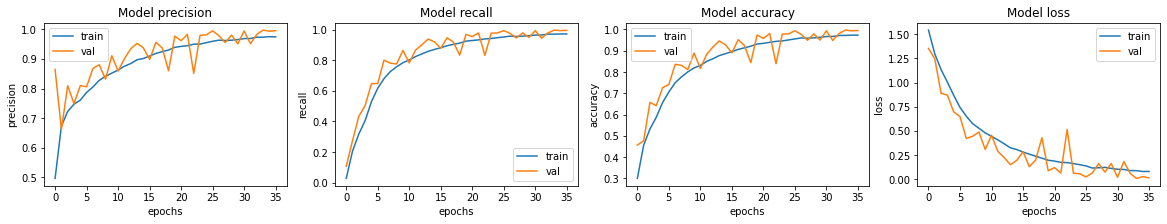

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

**Predicting on the test dataset**

In [33]:
predictions = model.predict(test_dataset)

20/20 [==============================] - 12s 590ms/step


In [34]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

* **A function to compute metrics based on predictions and true values and printing them**
* The predictions aren't whole numbers like 0,1 etc. but a decimal between 0 and 1 so to give the final output of a prediction as an integer we pass it through argmax function of numpy. These are then summated and passed on to calculate metrics of the model like Precision, Recall, F1 Score and Confusion Matrix and then printed

In [35]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(5,5))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

Accuracy: 0.9976
Precision: 0.9976071665242836
Recall: 0.9975999999999999
F1_score: 0.9975999891927314


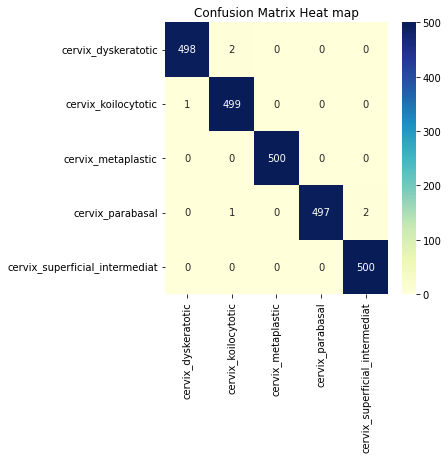

In [36]:
evaluate(test_dataset.classes,predictions)

In [37]:
model.evaluate(test_dataset)

20/20 [==============================] - 12s 603ms/step - loss: 0.0100 - accuracy: 0.9976 - precision: 0.9984 - recall: 0.9972


[0.009971987456083298,
 0.9976000189781189,
 0.9983980655670166,
 0.9972000122070312]

**An Important function which is used to load the model in any file once it is saved**

In [38]:
from keras.models import load_model
model = load_model("/content/bestmodel.h5")

In [39]:
acc = model.evaluate_generator(test_dataset)[1]
print(f"The accuracy of our model is {acc*100} %")

The accuracy of our model is 99.6399998664856 %
